In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(123)

In [3]:
def generate_trian_data(size):
    x_train = np.random.uniform(-1,1,size=(size))
    y_train = x_train*0.3+np.random.normal(0,0.05,(size))
    return x_train,y_train
x_train,y_train = generate_trian_data(200)
x_test,y_test = generate_trian_data(50)

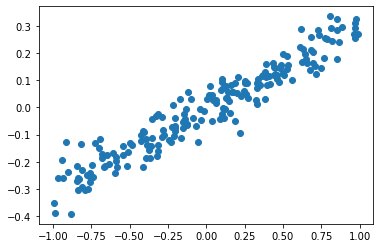

In [4]:
plt.scatter(x_train,y_train)

In [5]:
x_t,x_val,y_t,y_val = train_test_split(x_train,y_train,test_size=0.2)

In [6]:
model = Sequential()
model.add(Dense(1,input_dim=1))
model.compile(loss="mse",optimizer="sgd",metrics=['accuracy'])

In [7]:
hist = model.fit(x_t,y_t,validation_data=(x_val,y_val),epochs=200,verbose=0)

for step in range(200):
    cost = model.train_on_batch(x_t,y_t)
    if step%50==0:
        print(step,cost)

In [8]:
cost = model.evaluate(x_test,y_test)
print(cost)

2/2 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.0000e+00
[0.0026039895601570606, 0.0]


In [9]:
w,b = model.layers[0].get_weights()

In [10]:
print(w)

[[0.29470828]]


In [11]:
print(b)

[-0.00280318]


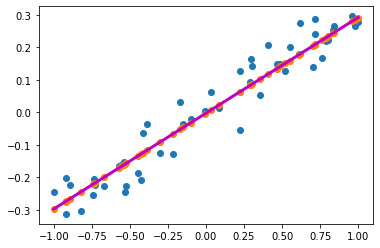

In [12]:
y_pred = model.predict(x_test)
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred)
plt.plot(np.linspace(-1,1,10),np.linspace(-1,1,10)*w[0]+b,'m',linewidth=3)